# Preprocess of Baththaramulla

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.dates as mdates

## Import Data

### 2019 - 2021

In [2]:
df1 = pd.read_excel("../Data/Data Battaramulla AQMS - 1 Hour - From 2019 to 2021 mid (with NOx).xlsx")

### 2022 - 2023

In [3]:
df2 = pd.read_excel("../Data/Data Battaramulla AQMS - 1 Hour - From 2022-10 Oct to 2023 End (with NOx).xlsx")

### 2024

In [4]:
df3 = pd.read_excel("../Data/Data Battaramulla AQMS - 1 Hour - For 2024 (with NOx).xlsx")

### Combined the Dataframes

In [5]:
df_combined = pd.concat([df1,df2,df3],ignore_index=True)

#### New dataframe info

In [6]:
df_combined.shape

(41640, 19)

In [7]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41640 entries, 0 to 41639
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Period Start Time  41640 non-null  datetime64[ns]
 1   Period End Time    41640 non-null  datetime64[ns]
 2   AT                 21124 non-null  float64       
 3   RH                 33515 non-null  float64       
 4   BP                 33568 non-null  float64       
 5   Solar Rad          30791 non-null  float64       
 6   Rain Gauge         32973 non-null  float64       
 7   WS Raw             12601 non-null  float64       
 8   WD Raw             33575 non-null  float64       
 9   WS Average         12689 non-null  float64       
 10  WD Average         16732 non-null  float64       
 11  O3 Conc            25107 non-null  float64       
 12  CO Conc            20194 non-null  float64       
 13  NO Conc            31638 non-null  float64       
 14  NO2 Co

In [8]:
df_combined.describe()

,Period Start Time,Period End Time,AT,RH,BP,Solar Rad,Rain Gauge,WS Raw,WD Raw,WS Average,WD Average,O3 Conc,CO Conc,NO Conc,NO2 Conc,NOx Conc,SO2 Conc,PM2.5 Conc,PM10 Conc
count,41640,41640,21124.000000,33515.000000,33568.000000,30791.000000,32973.000000,12601.000000,33575.000000,12689.000000,16732.000000,25107.000000,20194.000000,31638.000000,31604.000000,31637.000000,28981.000000,29273.000000,24761.000000
mean,2021-12-20 06:11:17.496066560,2021-12-20 07:11:17.463976960,28.022401,73.932897,1009.850003,177.343337,0.350499,1.067352,176.827026,0.881259,166.046235,13.360517,519.657931,5.596364,10.127867,15.723119,7.528441,23.062481,36.132709
min,2019-01-01 00:00:00,2019-01-01 01:00:00,16.300000,26.780000,976.400000,0.000000,0.000000,0.000000,55.100000,0.000000,0.000000,-1.930000,35.320000,-4.790000,-0.450000,-0.400000,0.150000,-4.000000,0.000000
25%,2020-03-09 17:45:00,2020-03-09 18:45:00,25.700000,65.030000,1008.500000,0.280000,0.000000,0.300000,115.150000,0.200000,83.900000,4.640000,294.725000,0.650000,4.370000,6.070000,4.650000,10.000000,21.000000
50%,2021-05-17 11:30:00,2021-05-17 12:30:00,27.800000,75.530000,1009.800000,8.420000,0.000000,0.800000,189.000000,0.600000,199.600000,9.930000,426.000000,2.160000,7.940000,11.030000,6.250000,19.000000,31.000000
75%,2023-10-25 05:15:00,2023-10-25 06:15:00,30.400000,84.360000,1011.200000,342.825000,0.000000,1.700000,229.100000,1.400000,235.700000,17.890000,635.935000,6.130000,14.110000,20.990000,9.680000,32.000000,45.000000
max,2024-12-31 23:00:00,2025-01-01 00:00:00,35.700000,95.040000,1017.100000,961.300000,60.000000,6.300000,300.100000,5.400000,360.000000,92.640000,4559.000000,240.350000,57.080000,255.340000,75.040000,142.000000,218.000000
std,NaN,NaN,2.866367,12.246013,1.986292,244.890616,2.301753,0.899202,61.215875,0.792619,100.473561,11.966432,367.121060,9.095636,7.872557,14.577447,4.224653,17.174139,21.756105


## Duplicates

In [9]:
df_combined.duplicated().sum()

0

No duplicates there for we don't need to do anything about it 

## Null check

In [10]:
df_combined.isnull().sum()

Period Start Time        0
Period End Time          0
AT                   20516
RH                    8125
BP                    8072
Solar Rad            10849
Rain Gauge            8667
WS Raw               29039
WD Raw                8065
WS Average           28951
WD Average           24908
O3 Conc              16533
CO Conc              21446
NO Conc              10002
NO2 Conc             10036
NOx Conc             10003
SO2 Conc             12659
PM2.5 Conc           12367
PM10 Conc            16879
dtype: int64

Should we drop WS Raw, CO columns. They have null more than 50%. If we fill them with any methods, it just adds so much noise. I think it is better to drop them. What do you think? Let me know 

<function matplotlib.pyplot.show(close=None, block=None)>

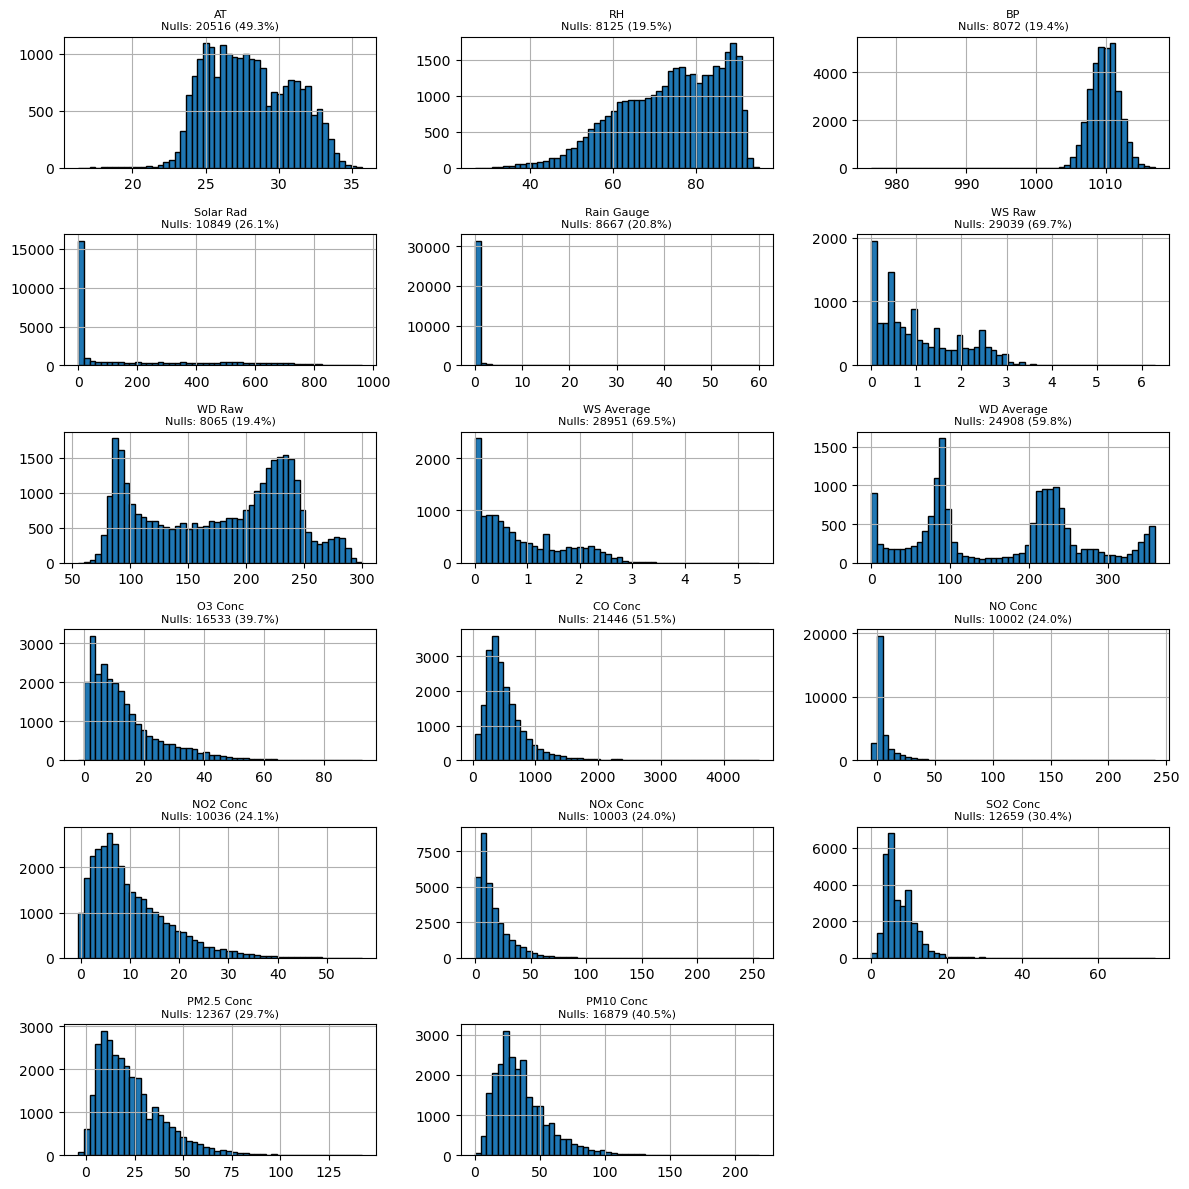

In [11]:
numeric_cols = [col for col in df_combined.columns if pd.api.types.is_numeric_dtype(df_combined[col])]

# Layout setup
n_cols = 3   # number of plots per row
n_rows = math.ceil(len(numeric_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*2))
axes = axes.flatten()  # make it 1D for easy iteration

for i, col in enumerate(numeric_cols):
    df_combined[col].hist(ax=axes[i], bins=50, edgecolor='black')
    axes[i].set_title(f"{col}\nNulls: {df_combined[col].isna().sum()} ({df_combined[col].isna().mean()*100:.1f}%)", fontsize=8)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Hide any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show

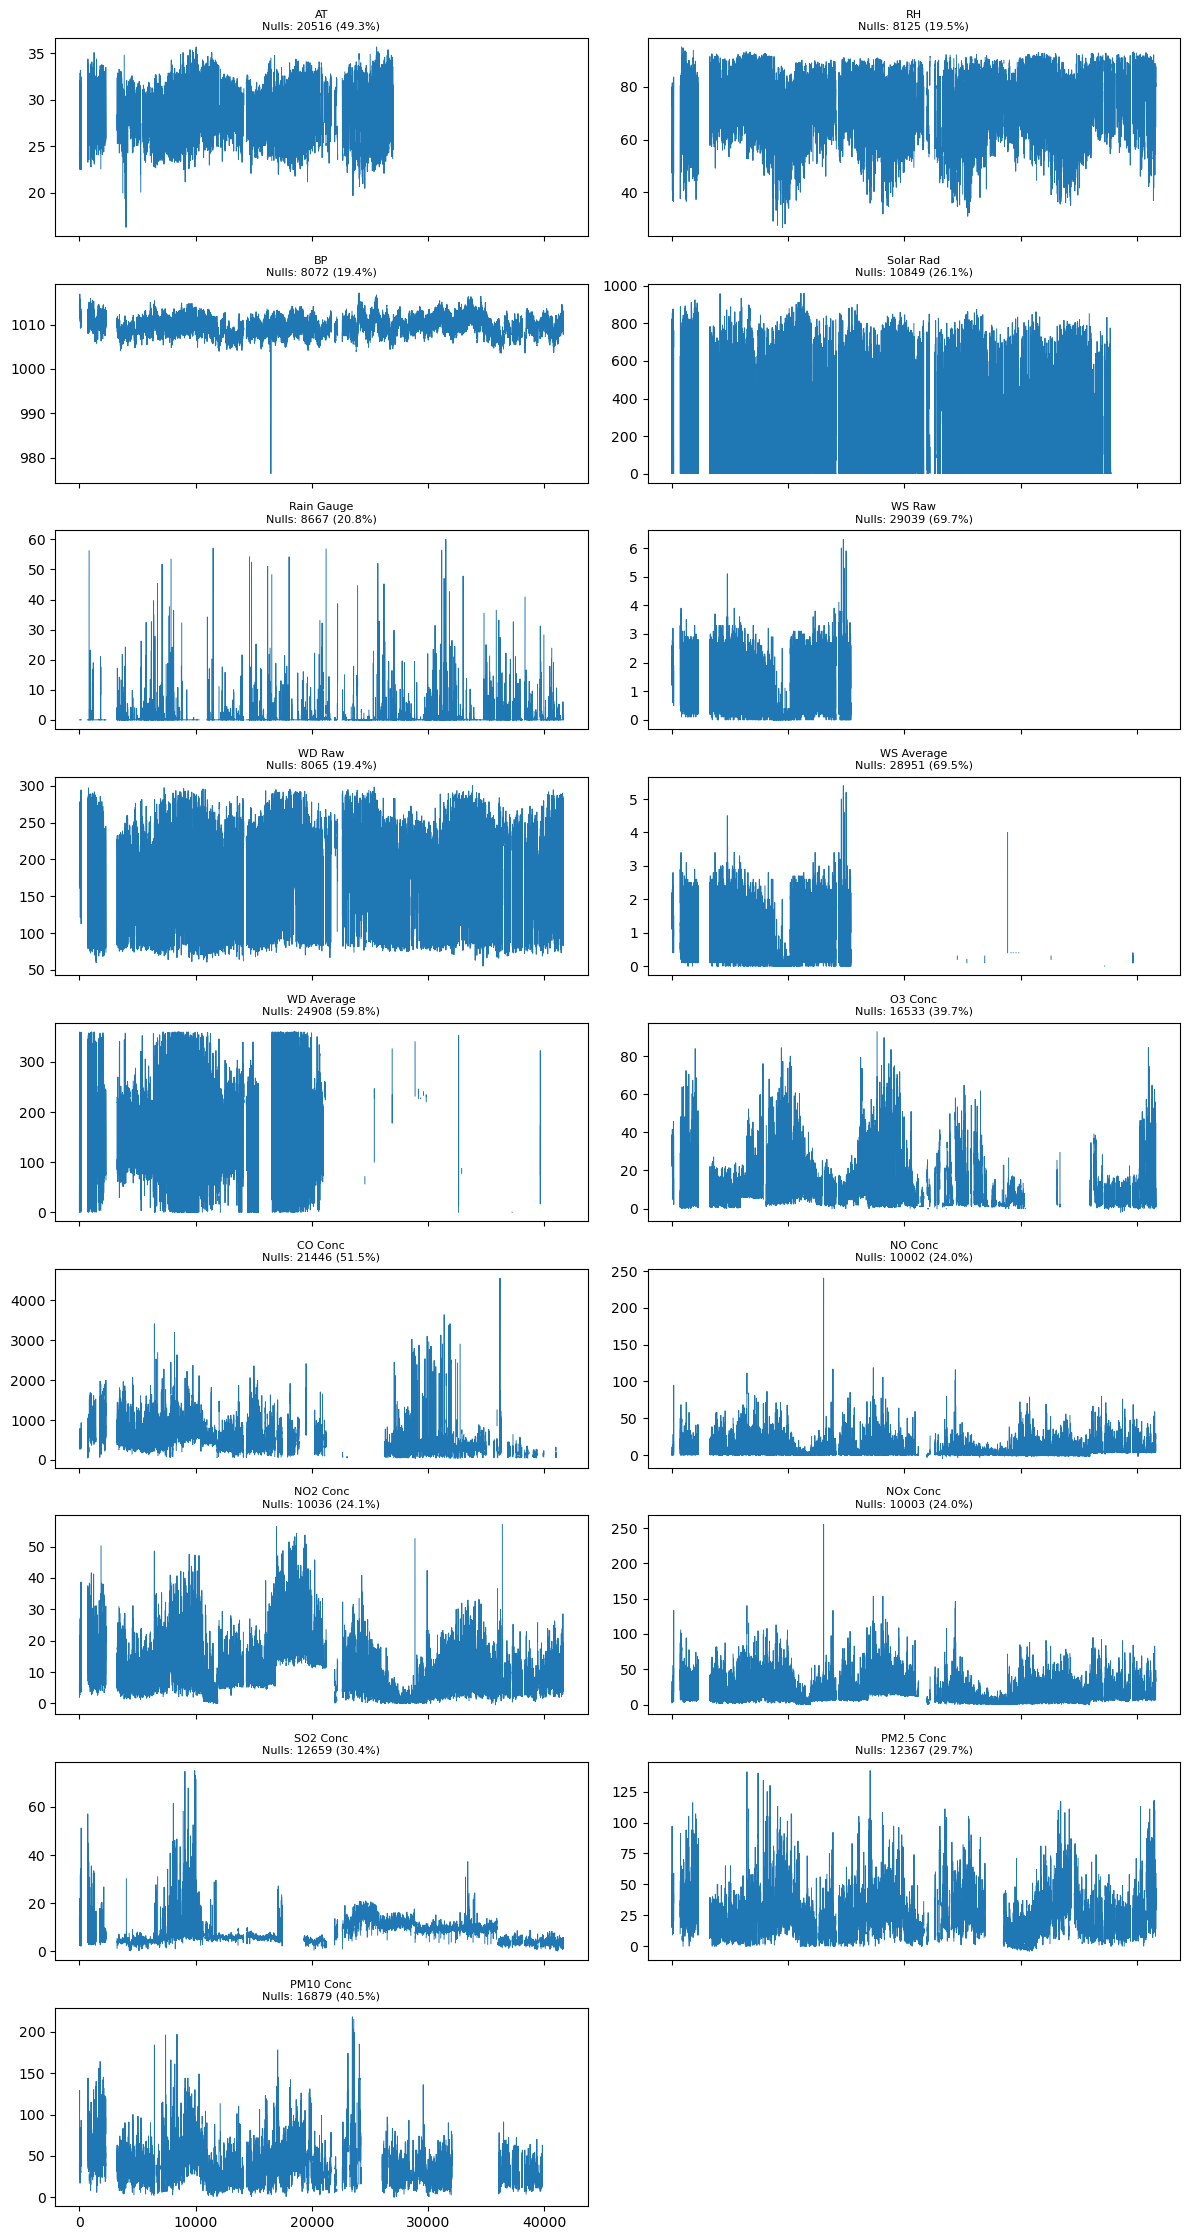

In [12]:
numeric_cols = [col for col in df_combined.columns if pd.api.types.is_numeric_dtype(df_combined[col])]

# Layout setup
n_cols = 2   # number of plots per row
n_rows = math.ceil(len(numeric_cols) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*2.5), sharex=True)
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    axes[i].plot(df_combined.index, df_combined[col], linewidth=0.7)
    axes[i].set_title(f"{col}\nNulls: {df_combined[col].isna().sum()} ({df_combined[col].isna().mean()*100:.1f}%)", fontsize=8)
    axes[i].set_ylabel("")
    axes[i].set_xlabel("")

# Hide unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Conclutions

1. We should drop WS Raw and CO 
<br> 
2. There is a large gap in data missing in 2021 - July to 2022 Oct. Filling this data is almost impossible. Even if we fill this, it introduces so much data (new 10800 records). If we were to fill that data, it doesn't even have any seasonality. Instead of doing this, we should split this gap or remove that gap. We can split the data one is 2019 to 2021 June other from 2022 November to 2024. I think this is the best way to do this
3. If we do the above method, null will be reduced, then we don't need to drop those columns. I have to check before doing it

## Split The Dataframes

* Start 2021-06-22 06:00:00
* End 2022-10-03 08:00:00

In [13]:
df_combined[df_combined['Period Start Time'] == '2021-06-22 06:00:00']

,Period Start Time,Period End Time,AT,RH,BP,Solar Rad,Rain Gauge,WS Raw,WD Raw,WS Average,WD Average,O3 Conc,CO Conc,NO Conc,NO2 Conc,NOx Conc,SO2 Conc,PM2.5 Conc,PM10 Conc
21678,2021-06-22 06:00:00,2021-06-22 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_combined[df_combined['Period Start Time'] == '2022-10-03 08:00:00']

,Period Start Time,Period End Time,AT,RH,BP,Solar Rad,Rain Gauge,WS Raw,WD Raw,WS Average,WD Average,O3 Conc,CO Conc,NO Conc,NO2 Conc,NOx Conc,SO2 Conc,PM2.5 Conc,PM10 Conc
21944,2022-10-03 08:00:00,2022-10-03 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
start_date = '2021-06-22 06:00:00'
end_date = '2022-10-03 08:00:00'

In [16]:
df_combined2 = df_combined[~((df_combined['Period Start Time'] >= start_date) & (df_combined['Period Start Time'] <= end_date))]

In [17]:
df_combined2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41373 entries, 0 to 41639
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Period Start Time  41373 non-null  datetime64[ns]
 1   Period End Time    41373 non-null  datetime64[ns]
 2   AT                 21124 non-null  float64       
 3   RH                 33515 non-null  float64       
 4   BP                 33568 non-null  float64       
 5   Solar Rad          30791 non-null  float64       
 6   Rain Gauge         32973 non-null  float64       
 7   WS Raw             12601 non-null  float64       
 8   WD Raw             33575 non-null  float64       
 9   WS Average         12689 non-null  float64       
 10  WD Average         16732 non-null  float64       
 11  O3 Conc            25107 non-null  float64       
 12  CO Conc            20194 non-null  float64       
 13  NO Conc            31638 non-null  float64       
 14  NO2 Conc   

In [18]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41640 entries, 0 to 41639
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Period Start Time  41640 non-null  datetime64[ns]
 1   Period End Time    41640 non-null  datetime64[ns]
 2   AT                 21124 non-null  float64       
 3   RH                 33515 non-null  float64       
 4   BP                 33568 non-null  float64       
 5   Solar Rad          30791 non-null  float64       
 6   Rain Gauge         32973 non-null  float64       
 7   WS Raw             12601 non-null  float64       
 8   WD Raw             33575 non-null  float64       
 9   WS Average         12689 non-null  float64       
 10  WD Average         16732 non-null  float64       
 11  O3 Conc            25107 non-null  float64       
 12  CO Conc            20194 non-null  float64       
 13  NO Conc            31638 non-null  float64       
 14  NO2 Co

In [19]:
41640 - 41373

267

This is not what I expect even though there gap of 15 months data missing according to time actucal data only have 267 records. So removing that time gap remove only 267 null records only.
* Before 41640
* Now 41373

In [20]:
df_combined.isnull().sum()

Period Start Time        0
Period End Time          0
AT                   20516
RH                    8125
BP                    8072
Solar Rad            10849
Rain Gauge            8667
WS Raw               29039
WD Raw                8065
WS Average           28951
WD Average           24908
O3 Conc              16533
CO Conc              21446
NO Conc              10002
NO2 Conc             10036
NOx Conc             10003
SO2 Conc             12659
PM2.5 Conc           12367
PM10 Conc            16879
dtype: int64

In [21]:
(20249/ 41373) * 100

48.94254707176178

In [22]:
df_combined2.isnull().sum()

Period Start Time        0
Period End Time          0
AT                   20249
RH                    7858
BP                    7805
Solar Rad            10582
Rain Gauge            8400
WS Raw               28772
WD Raw                7798
WS Average           28684
WD Average           24641
O3 Conc              16266
CO Conc              21179
NO Conc               9735
NO2 Conc              9769
NOx Conc              9736
SO2 Conc             12392
PM2.5 Conc           12100
PM10 Conc            16612
dtype: int64

## Remove the null columns

In [23]:
df_combined3 = df_combined2.drop(['WS Raw','CO Conc'], axis=1)

In [24]:
df_combined3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41373 entries, 0 to 41639
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Period Start Time  41373 non-null  datetime64[ns]
 1   Period End Time    41373 non-null  datetime64[ns]
 2   AT                 21124 non-null  float64       
 3   RH                 33515 non-null  float64       
 4   BP                 33568 non-null  float64       
 5   Solar Rad          30791 non-null  float64       
 6   Rain Gauge         32973 non-null  float64       
 7   WD Raw             33575 non-null  float64       
 8   WS Average         12689 non-null  float64       
 9   WD Average         16732 non-null  float64       
 10  O3 Conc            25107 non-null  float64       
 11  NO Conc            31638 non-null  float64       
 12  NO2 Conc           31604 non-null  float64       
 13  NOx Conc           31637 non-null  float64       
 14  SO2 Conc   

## Null threatment

### Forward-Filling Method

In [65]:
df_ffill = df_combined3.ffill()

In [66]:
df_ffill.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41373 entries, 0 to 41639
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Period Start Time  41373 non-null  datetime64[ns]
 1   Period End Time    41373 non-null  datetime64[ns]
 2   AT                 41373 non-null  float64       
 3   RH                 41373 non-null  float64       
 4   BP                 41373 non-null  float64       
 5   Solar Rad          41373 non-null  float64       
 6   Rain Gauge         41373 non-null  float64       
 7   WD Raw             41373 non-null  float64       
 8   WS Average         41373 non-null  float64       
 9   WD Average         41373 non-null  float64       
 10  O3 Conc            41373 non-null  float64       
 11  NO Conc            41373 non-null  float64       
 12  NO2 Conc           41373 non-null  float64       
 13  NOx Conc           41373 non-null  float64       
 14  SO2 Conc   

In [67]:
df_ffill.isnull().sum()

Period Start Time    0
Period End Time      0
AT                   0
RH                   0
BP                   0
Solar Rad            0
Rain Gauge           0
WD Raw               0
WS Average           0
WD Average           0
O3 Conc              0
NO Conc              0
NO2 Conc             0
NOx Conc             0
SO2 Conc             0
PM2.5 Conc           0
PM10 Conc            0
dtype: int64

In [68]:
df_ffill.describe()

,Period Start Time,Period End Time,AT,RH,BP,Solar Rad,Rain Gauge,WD Raw,WS Average,WD Average,O3 Conc,NO Conc,NO2 Conc,NOx Conc,SO2 Conc,PM2.5 Conc,PM10 Conc
count,41373,41373,41373.000000,41373.000000,41373.000000,41373.000000,41373.000000,41373.000000,41373.000000,41373.000000,41373.000000,41373.000000,41373.000000,41373.000000,41373.000000,41373.000000,41373.000000
mean,2021-12-20 18:15:15.498905344,2021-12-20 19:15:15.466608640,26.881940,73.744397,1009.724385,161.801925,0.997042,178.559544,0.477686,163.311353,11.206018,5.616694,10.134720,15.759186,7.577098,23.184347,35.008025
min,2019-01-01 00:00:00,2019-01-01 01:00:00,16.300000,26.780000,976.400000,0.000000,0.000000,55.100000,0.000000,0.000000,-1.930000,-4.790000,-0.450000,-0.400000,0.150000,-4.000000,0.000000
25%,2020-03-06 23:00:00,2020-03-07 00:00:00,24.900000,64.510000,1008.300000,0.280000,0.000000,117.800000,0.100000,87.500000,2.230000,0.740000,4.500000,6.370000,4.640000,11.000000,22.000000
50%,2021-05-11 22:00:00,2021-05-11 23:00:00,25.500000,75.560000,1009.700000,1.480000,0.000000,191.100000,0.300000,210.300000,6.940000,2.530000,8.110000,11.410000,6.530000,19.000000,31.000000
75%,2023-10-28 00:00:00,2023-10-28 01:00:00,28.900000,84.440000,1011.100000,293.420000,0.000000,230.400000,0.400000,230.700000,15.350000,6.780000,14.250000,21.480000,9.590000,32.000000,42.000000
max,2024-12-31 23:00:00,2025-01-01 00:00:00,35.700000,95.040000,1017.100000,961.300000,60.000000,300.100000,5.400000,360.000000,92.640000,240.350000,57.080000,255.340000,75.040000,142.000000,218.000000
std,NaN,NaN,2.790204,12.731539,1.977960,237.388604,5.010220,62.472623,0.575296,93.532525,12.132730,8.708560,7.586342,13.964563,4.192583,17.036399,20.813026


In [69]:
df_combined.describe()

,Period Start Time,Period End Time,AT,RH,BP,Solar Rad,Rain Gauge,WS Raw,WD Raw,WS Average,WD Average,O3 Conc,CO Conc,NO Conc,NO2 Conc,NOx Conc,SO2 Conc,PM2.5 Conc,PM10 Conc
count,41640,41640,21124.000000,33515.000000,33568.000000,30791.000000,32973.000000,12601.000000,33575.000000,12689.000000,16732.000000,25107.000000,20194.000000,31638.000000,31604.000000,31637.000000,28981.000000,29273.000000,24761.000000
mean,2021-12-20 06:11:17.496066560,2021-12-20 07:11:17.463976960,28.022401,73.932897,1009.850003,177.343337,0.350499,1.067352,176.827026,0.881259,166.046235,13.360517,519.657931,5.596364,10.127867,15.723119,7.528441,23.062481,36.132709
min,2019-01-01 00:00:00,2019-01-01 01:00:00,16.300000,26.780000,976.400000,0.000000,0.000000,0.000000,55.100000,0.000000,0.000000,-1.930000,35.320000,-4.790000,-0.450000,-0.400000,0.150000,-4.000000,0.000000
25%,2020-03-09 17:45:00,2020-03-09 18:45:00,25.700000,65.030000,1008.500000,0.280000,0.000000,0.300000,115.150000,0.200000,83.900000,4.640000,294.725000,0.650000,4.370000,6.070000,4.650000,10.000000,21.000000
50%,2021-05-17 11:30:00,2021-05-17 12:30:00,27.800000,75.530000,1009.800000,8.420000,0.000000,0.800000,189.000000,0.600000,199.600000,9.930000,426.000000,2.160000,7.940000,11.030000,6.250000,19.000000,31.000000
75%,2023-10-25 05:15:00,2023-10-25 06:15:00,30.400000,84.360000,1011.200000,342.825000,0.000000,1.700000,229.100000,1.400000,235.700000,17.890000,635.935000,6.130000,14.110000,20.990000,9.680000,32.000000,45.000000
max,2024-12-31 23:00:00,2025-01-01 00:00:00,35.700000,95.040000,1017.100000,961.300000,60.000000,6.300000,300.100000,5.400000,360.000000,92.640000,4559.000000,240.350000,57.080000,255.340000,75.040000,142.000000,218.000000
std,NaN,NaN,2.866367,12.246013,1.986292,244.890616,2.301753,0.899202,61.215875,0.792619,100.473561,11.966432,367.121060,9.095636,7.872557,14.577447,4.224653,17.174139,21.756105


<function matplotlib.pyplot.show(close=None, block=None)>

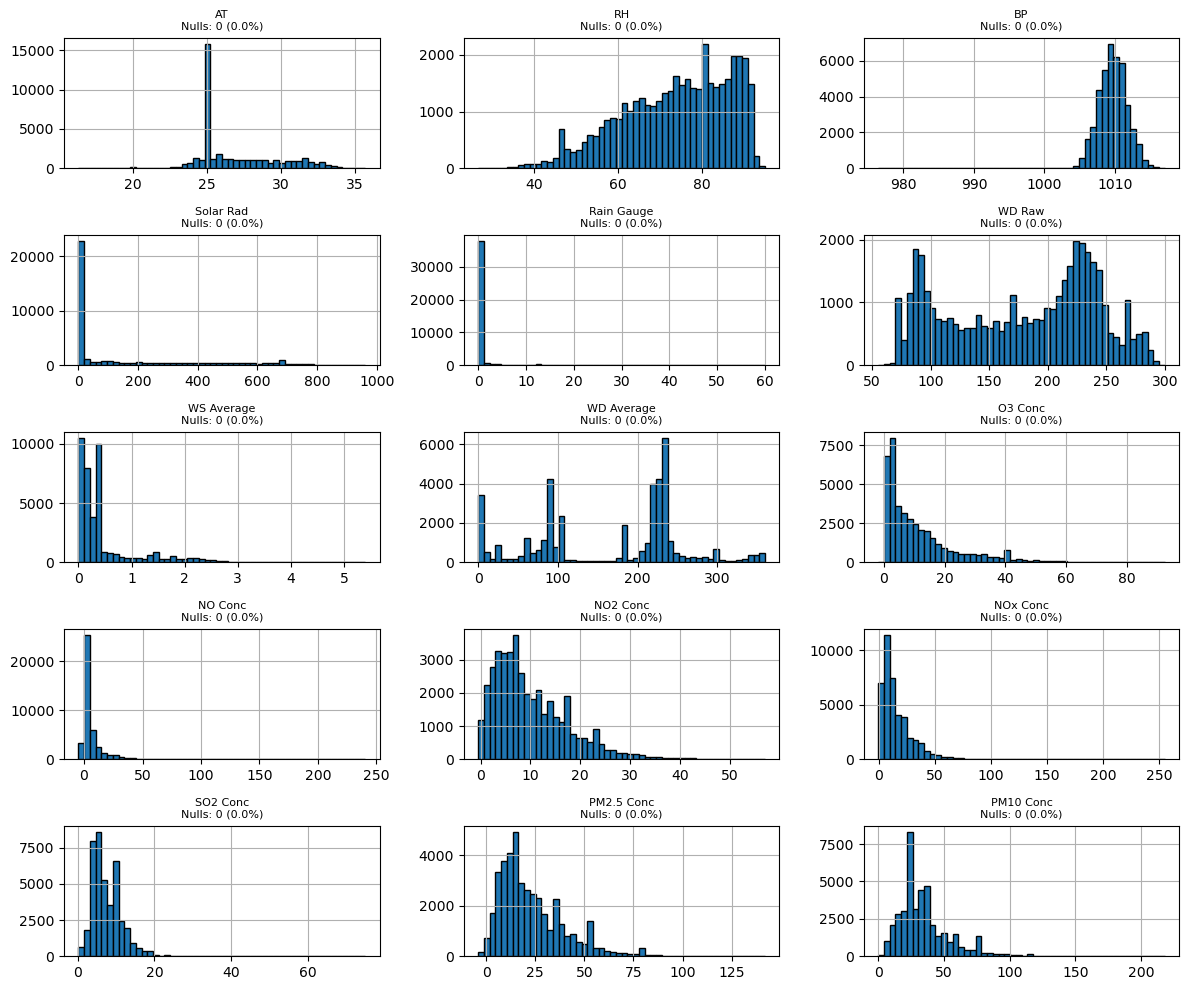

In [70]:
numeric_cols = [col for col in df_ffill.columns if pd.api.types.is_numeric_dtype(df_ffill[col])]

# Layout setup
n_cols = 3   # number of plots per row
n_rows = math.ceil(len(numeric_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*2))
axes = axes.flatten()  # make it 1D for easy iteration

for i, col in enumerate(numeric_cols):
    df_ffill[col].hist(ax=axes[i], bins=50, edgecolor='black')
    axes[i].set_title(f"{col}\nNulls: {df_ffill[col].isna().sum()} ({df_ffill[col].isna().mean()*100:.1f}%)", fontsize=8)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Hide any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21016\1691756452.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_o3_time['Date'] = df_o3_time['Period Start Time'].dt.date


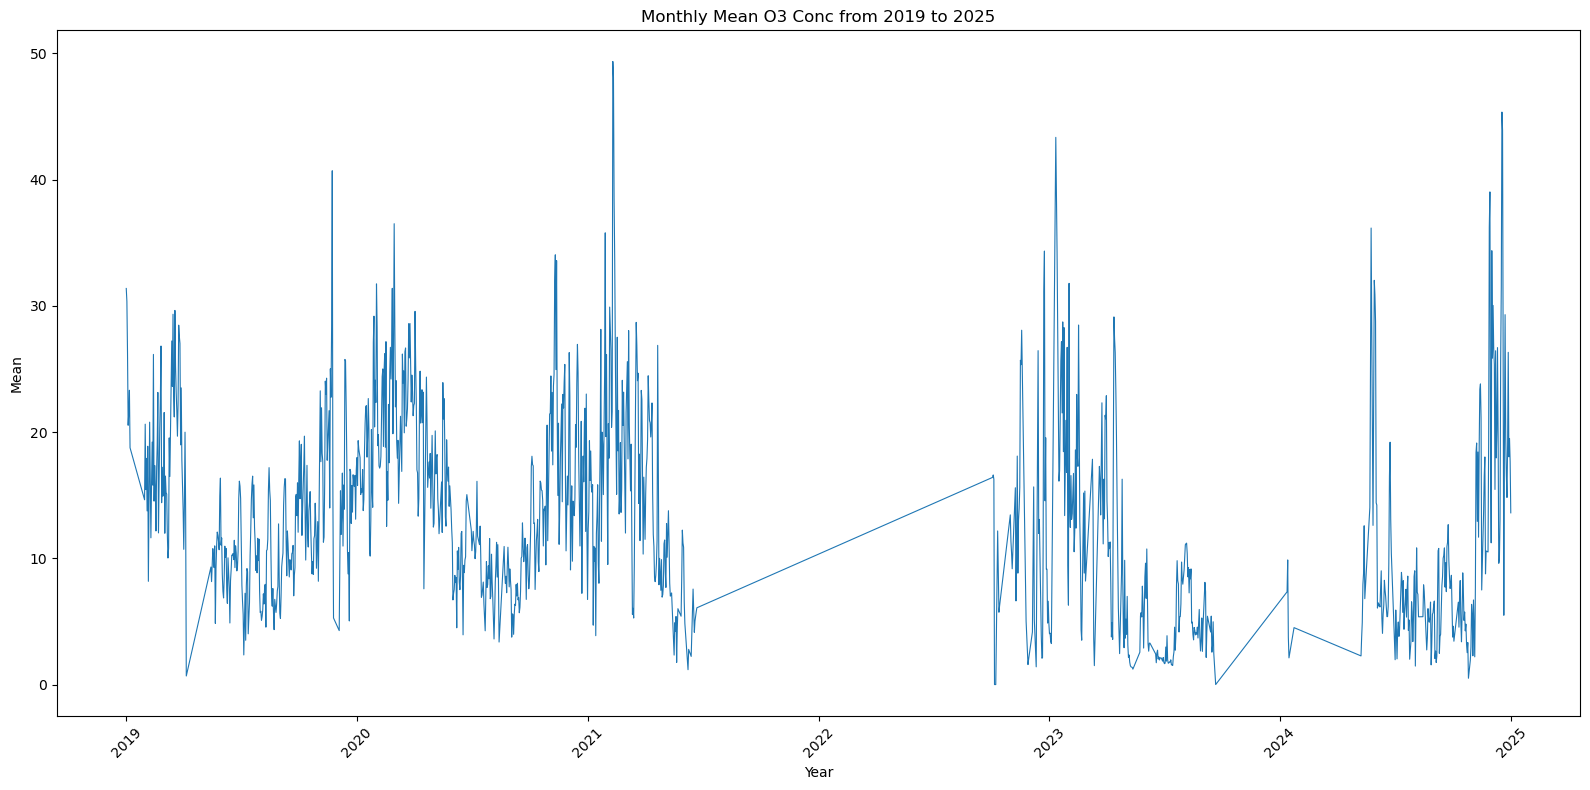

In [72]:
df_o3_time = df_combined3[['Period Start Time','O3 Conc']]

df_o3_time['Date'] = df_o3_time['Period Start Time'].dt.date

df_filtered = df_o3_time[(df_o3_time['Period Start Time'].dt.year >= 2019) &
                         (df_o3_time['Period Start Time'].dt.year <= 2024)]

daily_at = df_filtered.groupby('Date')['O3 Conc'].mean().reset_index()

plt.figure(figsize=(16, 8))
sns.lineplot(x='Date', y='O3 Conc', data=daily_at, linewidth=0.8)
plt.title('Monthly Mean O3 Conc from 2019 to 2025')
plt.xlabel('Year')
plt.ylabel('Mean')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21016\133919131.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_o3_time['Date'] = df_o3_time['Period Start Time'].dt.date


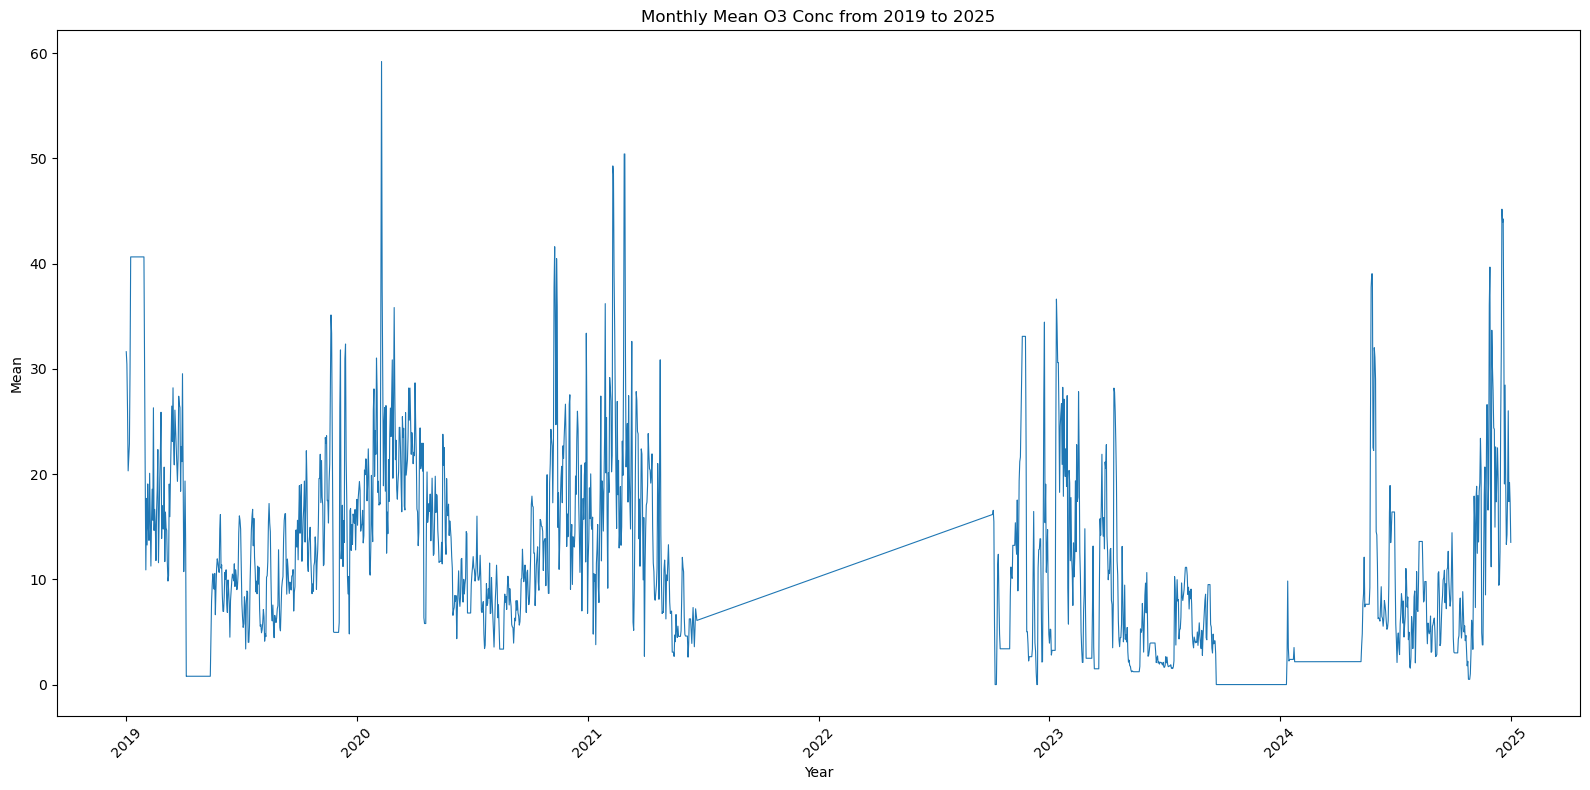

In [73]:
df_o3_time = df_ffill[['Period Start Time','O3 Conc']]

df_o3_time['Date'] = df_o3_time['Period Start Time'].dt.date

df_filtered = df_o3_time[(df_o3_time['Period Start Time'].dt.year >= 2019) &
                         (df_o3_time['Period Start Time'].dt.year <= 2024)]

daily_at = df_filtered.groupby('Date')['O3 Conc'].mean().reset_index()

plt.figure(figsize=(16, 8))
sns.lineplot(x='Date', y='O3 Conc', data=daily_at, linewidth=0.8)
plt.title('Monthly Mean O3 Conc from 2019 to 2025')
plt.xlabel('Year')
plt.ylabel('Mean')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Backward Filling method

In [36]:
df_bfill = df_combined.bfill()

In [37]:
df_bfill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41640 entries, 0 to 41639
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Period Start Time  41640 non-null  datetime64[ns]
 1   Period End Time    41640 non-null  datetime64[ns]
 2   AT                 27031 non-null  float64       
 3   RH                 41640 non-null  float64       
 4   BP                 41640 non-null  float64       
 5   Solar Rad          37781 non-null  float64       
 6   Rain Gauge         41640 non-null  float64       
 7   WS Raw             15407 non-null  float64       
 8   WD Raw             41640 non-null  float64       
 9   WS Average         39684 non-null  float64       
 10  WD Average         39684 non-null  float64       
 11  O3 Conc            41640 non-null  float64       
 12  CO Conc            41015 non-null  float64       
 13  NO Conc            41640 non-null  float64       
 14  NO2 Co

In [38]:
df_bfill.describe()

,Period Start Time,Period End Time,AT,RH,BP,Solar Rad,Rain Gauge,WS Raw,WD Raw,WS Average,WD Average,O3 Conc,CO Conc,NO Conc,NO2 Conc,NOx Conc,SO2 Conc,PM2.5 Conc,PM10 Conc
count,41640,41640,27031.000000,41640.000000,41640.000000,37781.000000,41640.000000,15407.000000,41640.000000,39684.000000,39684.000000,41640.000000,41015.000000,41640.000000,41640.000000,41640.000000,41640.000000,41640.000000,39846.000000
mean,2021-12-20 06:11:17.496066560,2021-12-20 07:11:17.463976960,28.455788,72.368906,1009.858706,214.983063,0.346681,1.132466,181.597586,0.667496,158.384298,13.306508,445.501234,5.463336,10.894402,16.379409,7.092489,19.984006,33.340059
min,2019-01-01 00:00:00,2019-01-01 01:00:00,16.300000,26.780000,976.400000,0.000000,0.000000,0.000000,55.100000,0.000000,0.000000,-1.930000,35.320000,-4.790000,-0.450000,-0.400000,0.150000,-4.000000,0.000000
25%,2020-03-09 17:45:00,2020-03-09 18:45:00,26.000000,63.110000,1008.500000,0.280000,0.000000,0.400000,125.300000,0.100000,71.000000,3.680000,215.810000,0.680000,4.800000,6.530000,4.350000,8.000000,20.000000
50%,2021-05-17 11:30:00,2021-05-17 12:30:00,28.400000,74.060000,1009.900000,50.760000,0.000000,0.900000,199.300000,0.300000,172.900000,10.850000,322.700000,2.380000,8.890000,12.210000,5.900000,16.000000,29.000000
75%,2023-10-25 05:15:00,2023-10-25 06:15:00,31.000000,82.982500,1011.200000,435.810000,0.000000,1.900000,229.100000,0.600000,237.600000,19.710000,519.540000,6.330000,15.540000,21.320000,9.420000,27.000000,42.000000
max,2024-12-31 23:00:00,2025-01-01 00:00:00,35.700000,95.040000,1017.100000,961.300000,60.000000,6.300000,300.100000,5.400000,360.000000,92.640000,4559.000000,240.350000,57.080000,255.340000,75.040000,142.000000,218.000000
std,NaN,NaN,2.961522,12.883584,1.981922,259.730895,2.261973,0.957935,59.179516,0.969768,115.884087,11.473770,422.640309,8.803709,8.300497,14.721376,4.230877,16.258300,20.457804


<function matplotlib.pyplot.show(close=None, block=None)>

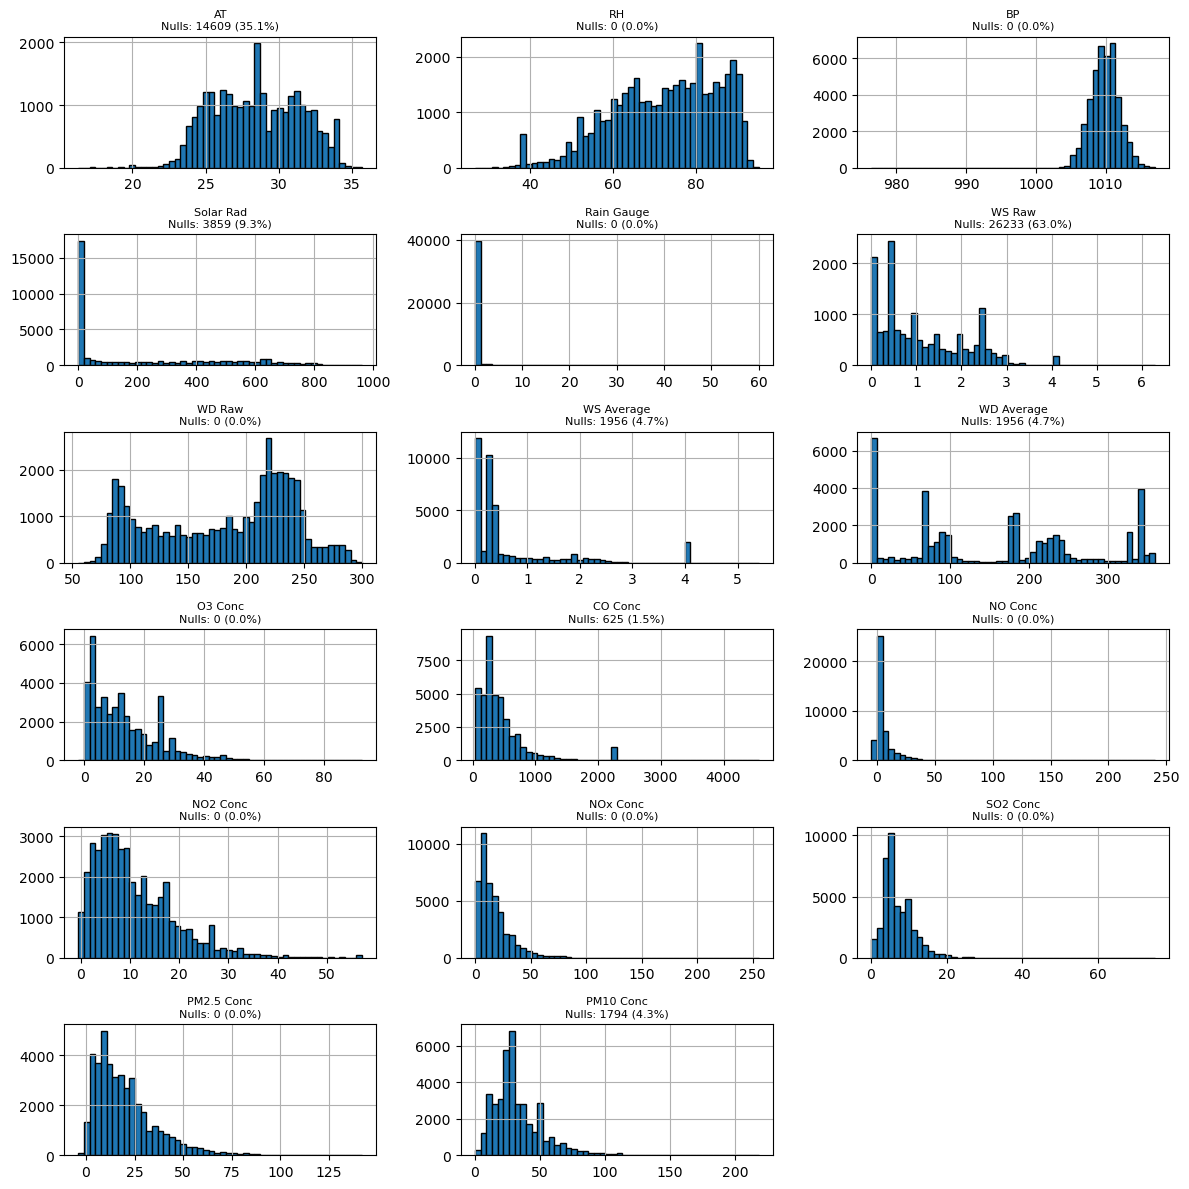

In [39]:
numeric_cols = [col for col in df_bfill.columns if pd.api.types.is_numeric_dtype(df_bfill[col])]

# Layout setup
n_cols = 3   # number of plots per row
n_rows = math.ceil(len(numeric_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*2))
axes = axes.flatten()  # make it 1D for easy iteration

for i, col in enumerate(numeric_cols):
    df_bfill[col].hist(ax=axes[i], bins=50, edgecolor='black')
    axes[i].set_title(f"{col}\nNulls: {df_bfill[col].isna().sum()} ({df_bfill[col].isna().mean()*100:.1f}%)", fontsize=8)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Hide any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4128\876254517.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_o3_time['Date'] = df_o3_time['Period Start Time'].dt.date


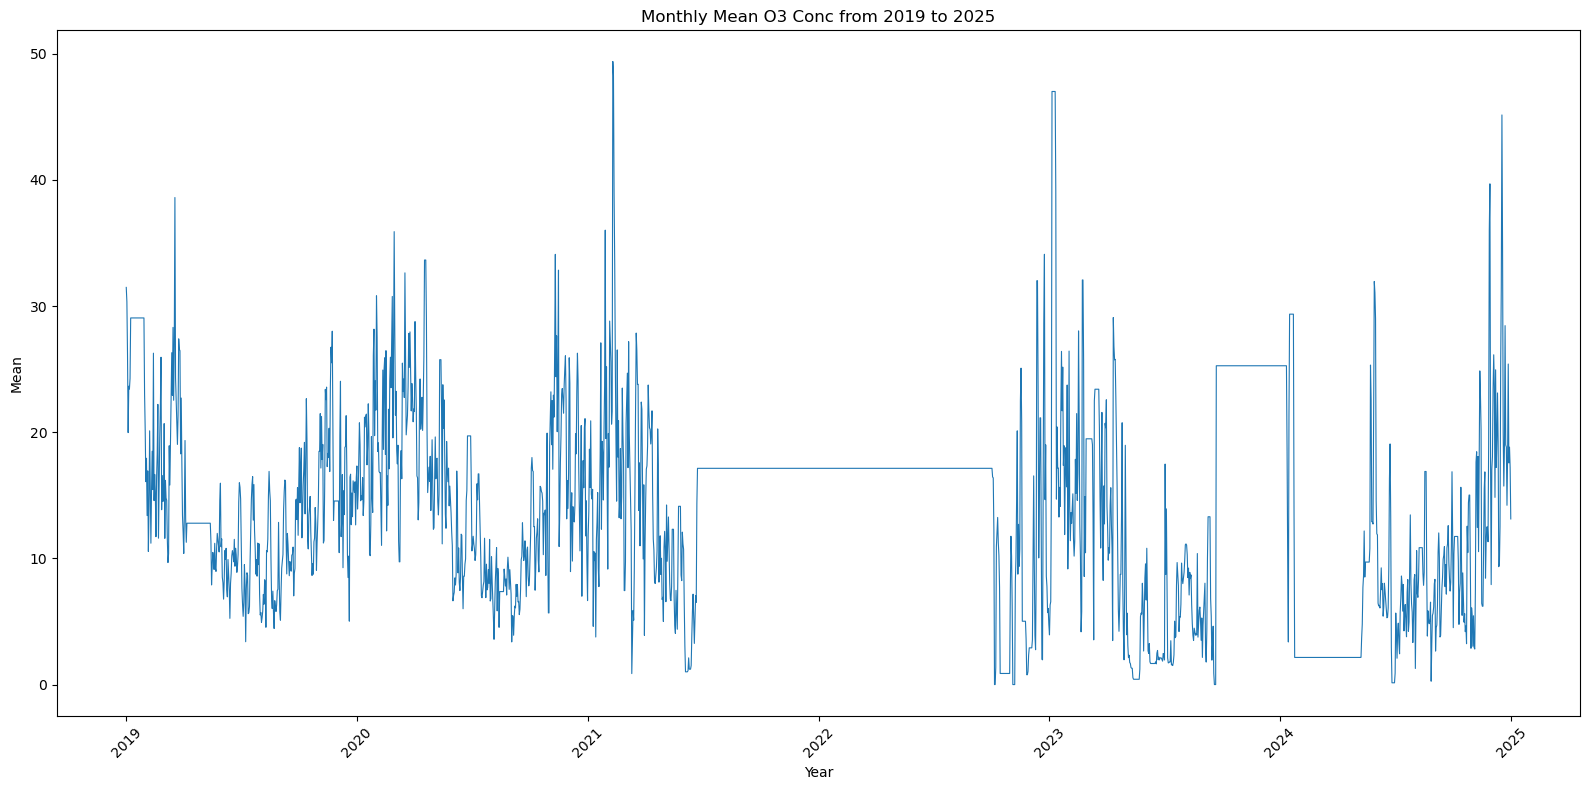

In [40]:
df_o3_time = df_bfill[['Period Start Time','O3 Conc']]

df_o3_time['Date'] = df_o3_time['Period Start Time'].dt.date

df_filtered = df_o3_time[(df_o3_time['Period Start Time'].dt.year >= 2019) &
                         (df_o3_time['Period Start Time'].dt.year <= 2024)]

daily_at = df_filtered.groupby('Date')['O3 Conc'].mean().reset_index()

plt.figure(figsize=(16, 8))
sns.lineplot(x='Date', y='O3 Conc', data=daily_at, linewidth=0.8)
plt.title('Monthly Mean O3 Conc from 2019 to 2025')
plt.xlabel('Year')
plt.ylabel('Mean')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [60]:
df = df_combined2

In [62]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# ---------- User params (tweak these) ----------
date_col_candidates = ['Period Start Time']
min_valid_datetime_frac = 0.8        # used when autodetecting date col
short_gap_hours = 3                  # gaps <= this filled with ffill
medium_gap_hours = 24 * 7            # gaps <= this use interpolation/regression (e.g., up to 1 week)
drop_col_missing_threshold = 0.75    # drop column if >75% missing (optional)
# ------------------------------------------------

# 1) Parse/Index the datetime
def detect_and_set_datetime_index(df):
    # prefer explicit names
    for cand in date_col_candidates:
        if cand in df.columns:
            df[cand] = pd.to_datetime(df[cand], errors='coerce')
            df = df.dropna(subset=[cand]).copy()
            df = df.set_index(cand).sort_index()
            return df
    # fallback: find any column that converts to datetime for > min_valid_datetime_frac
    for c in df.columns:
        parsed = pd.to_datetime(df[c], errors='coerce')
        if parsed.notna().mean() > min_valid_datetime_frac:
            df[c] = parsed
            df = df.dropna(subset=[c]).copy()
            df = df.set_index(c).sort_index()
            return df
    raise ValueError("Couldn't find a datetime column; please specify or ensure 'Period Start Time' exists.")

df = detect_and_set_datetime_index(df)

# 2) Remove time ranges that are completely null across all columns (if any)
#    find contiguous blocks where all columns are NA and drop them entirely
all_null = df.isna().all(axis=1)
# find contiguous True blocks
blocks = []
in_block = False
for ts, val in all_null.items():
    if val and not in_block:
        start = ts
        in_block = True
    if (not val) and in_block:
        end = prev_ts
        blocks.append((start, end))
        in_block = False
    prev_ts = ts
if in_block:
    blocks.append((start, prev_ts))

# Optionally drop only large blocks (e.g. longer than X days). Here we drop *any* block
for (s, e) in blocks:
    length = (e - s)  # a Timedelta
    # You can choose conditionally: e.g., if length > pd.Timedelta(days=2)
    df = df.drop(df.loc[s:e].index)

# 3) Keep a missing-indicator dataframe (important for TFT)
missing_flags = df.isna().astype(int).add_suffix('_missing')

# 4) Decide columns to drop (too-high missingness)
col_missing_frac = df.isna().mean()
cols_to_drop = col_missing_frac[col_missing_frac > drop_col_missing_threshold].index.tolist()
print("Columns with >{:.0%} missing (candidate to drop):".format(drop_col_missing_threshold), cols_to_drop)

# If you want to keep them, comment out next line
# df = df.drop(columns=cols_to_drop)

# 5) Function: compute consecutive NaN run-lengths (hours)
def nan_run_lengths(s):
    # s is a Series with datetime index (regular or irregular). We'll assume it's hourly-ish.
    is_na = s.isna().astype(int).values
    runs = []
    count = 0
    for v in is_na:
        if v == 1:
            count += 1
        elif count > 0:
            runs.append(count)
            count = 0
    if count > 0:
        runs.append(count)
    return runs

# 6) Short gaps -> ffill (but only those short runs)
def smart_ffill(series, max_gap=short_gap_hours):
    # We'll forward-fill then backfill for small segments only by masking long runs
    s = series.copy()
    n = len(s)
    isna = s.isna()
    if not isna.any():
        return s
    # find runs and where they start/end
    runs = []
    in_run = False
    for i, val in enumerate(isna):
        if val and not in_run:
            start_i = i
            in_run = True
        if (not val) and in_run:
            end_i = i-1
            runs.append((start_i, end_i))
            in_run = False
    if in_run:
        runs.append((start_i, n-1))
    arr = s.values
    for (a,b) in runs:
        run_len = b - a + 1
        if run_len <= max_gap:
            # ffill the run using previous value if exists else bfill from next value
            prev_idx = a-1
            next_idx = b+1
            if prev_idx >= 0 and not pd.isna(arr[prev_idx]):
                arr[a:b+1] = arr[prev_idx]
            elif next_idx < n and not pd.isna(arr[next_idx]):
                arr[a:b+1] = arr[next_idx]
            # else leave as NaN (cannot fill safely)
    return pd.Series(arr, index=s.index, name=s.name)

# Apply smart_ffill to all numeric columns
numeric_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])]
df_ffill_partial = df.copy()
for c in numeric_cols:
    df_ffill_partial[c] = smart_ffill(df[c], max_gap=short_gap_hours)

# 7) Medium gaps -> time interpolation (for smooth variables) or iterative imputer for correlated sets
#    We'll use a two-step approach:
#    (A) Interpolate 'smooth' meteorological variables with time interpolation (AT, RH, BP, Solar Rad, Rain)
#    (B) Use IterativeImputer (RF) for pollutant group and any remaining medium gaps

# A: choose typical weather columns (adjust list to your dataset)
weather_candidates = ['AT', 'RH', 'BP', 'Solar Rad', 'Rain Gauge', 'WS Average', 'WS Raw']
weather_cols = [c for c in weather_candidates if c in df.columns]

df_inter = df_ffill_partial.copy()
if len(weather_cols) > 0:
    df_inter[weather_cols] = df_inter[weather_cols].interpolate(method='time', limit=medium_gap_hours)  # limit in rows may map to hours if hourly

# B: Iterative imputer for pollutant group
pollutant_candidates = ['PM2.5 Conc', 'PM10 Conc', 'NO Conc', 'NO2 Conc', 'NOx Conc', 'SO2 Conc', 'O3 Conc', 'CO Conc']
pollutant_cols = [c for c in pollutant_candidates if c in df.columns]

# build imputer using RandomForest (nonlinear, preserves relationships)
if len(pollutant_cols) > 0:
    imputer = IterativeImputer(estimator=RandomForestRegressor(n_estimators=50, random_state=0),
                               max_iter=10, random_state=0, initial_strategy='median')
    # fit on rows where pollutants and some weather features exist
    cols_for_impute = pollutant_cols + [c for c in weather_cols if c in df_inter.columns]
    impute_df = df_inter[cols_for_impute].copy()
    # IterativeImputer wants numeric numpy array
    imputed_array = imputer.fit_transform(impute_df)
    imputed_df = pd.DataFrame(imputed_array, columns=cols_for_impute, index=impute_df.index)
    # only replace pollutant columns in df_inter (keep weather from interpolation)
    for c in pollutant_cols:
        df_inter[c] = imputed_df[c]

# 8) For any remaining NaNs (very start or very long gaps), optionally do a final conservative bfill/ffill but mark them
df_final = df_inter.copy()
# Keep track which cells were imputed vs original missing
was_missing = df.isna()

# final conservative filling only for isolated cases: ffill then bfill but do not overdo
df_final = df_final.ffill(limit=3).bfill(limit=3)  # only fill at most 3 consecutive rows as final smoothing

# 9) Reattach missing flags (useful for TFT)
df_final_with_flags = pd.concat([df_final, missing_flags], axis=1)

# 10) Sanity checks / quick diagnostics
print("Before: missing per col (fraction):")
print(col_missing_frac.sort_values(ascending=False))
print("\nAfter imputation: missing per col (fraction):")
print(df_final.isna().mean().sort_values(ascending=False))

# Quick distribution comparison for a few columns (example)
def quick_compare(col, npoints=5000):
    plt.figure(figsize=(10,3))
    s_orig = df[col].dropna()
    s_imputed = df_final[col].dropna()
    plt.subplot(1,2,1)
    s_orig.hist(bins=50); plt.title(f"{col} original (non-NaN)")
    plt.subplot(1,2,2)
    s_imputed.hist(bins=50); plt.title(f"{col} after imputation")
    plt.tight_layout()
    plt.show()

for c in (pollutant_cols + weather_cols)[:6]:
    if c in df.columns:
        quick_compare(c)


Columns with >75% missing (candidate to drop): []


KeyboardInterrupt: 